# Pure component properties for Methanol

In [1]:
import numpy as np
from epcsaftpy import component, pcsaft 

**Parameters from:** <br> 
J. Gross and G. Sadowski, *Ind. Eng. Chem. Res.*, 2002, **41**(22), 1244–1260. (https://doi.org/10.1021/ie010954d)

In [2]:
c2oh = component('Methanol', ms = 1.5255, sigma = 3.2300, eps = 188.90, 
                 kappaAB = 0.035176, eAB = 2899.5, sites = [0, 1, 1], Mw = 32.0422)
saft = pcsaft(c2oh)

**Critical point calculation**

In [3]:
print('Critical point calculation success: ', saft.critical)
if saft.critical:
    print(f' * Critical temperature : {round(saft.Tc,4)} K')
    print(f' * Critical pressure    : {round(saft.Pc,4)} Pa')
    print(f' * Critical density     : {round(saft.rhoc,4)} mol/m^3')

Critical point calculation success:  True
 * Critical temperature : 531.5254 K
 * Critical pressure    : 10654985.1392 Pa
 * Critical density     : 8114.7507 mol/m^3


**Density calculation**

In [4]:
T = 298.15   # K
P = 1.01325e5  # Pa
rhoL = saft.density(T, P, 'L')
rhoV = saft.density(T, P, 'V')
print(f'Liquid density : {round(rhoL,4)} mol/m3')
print(f'Vapor density  : {round(rhoV,4)} mol/m3')

Liquid density : 24675.6805 mol/m3
Vapor density  : 61.9289 mol/m3


**Pressure calculation**

In [5]:
T = 298.15   # K
P = saft.pressure(rhoL, T)
print(f'Pressure : {round(P,4)} Pa')

Pressure : 101325.0 Pa


**Saturation pressure**

In [6]:
T = 298.15   # K
Psat, vL, vV = saft.psat(T)
print(f'Saturation pressure    : {round(Psat,4)} Pa')
print(f'Liquid volume          : {round(vL,8)} m3/mol')
print(f'Vapor volume           : {round(vV,8)} m3/mol')

Saturation pressure    : 16406.8811 Pa
Liquid volume          : 4.053e-05 m3/mol
Vapor volume           : 0.13987267 m3/mol


**Saturation temperature**

In [7]:
P = 16406.8811   # Pa
T0 = 250.0        # K
Tsat, vL, vV = saft.tsat(P, T0 = T0)
print(f'Saturation temperature : {round(Tsat,4)} K')
print(f'Liquid volume          : {round(vL,8)} m3/mol')
print(f'Vapor volume           : {round(vV,8)} m3/mol')

Saturation temperature : 298.15 K
Liquid volume          : 4.053e-05 m3/mol
Vapor volume           : 0.13987267 m3/mol


**Chemical potentials**

In [8]:
Tsat = 298.15   # K
Psat, vL, vV = saft.psat(Tsat)
muL = saft.muad(1/vL, Tsat)
muV = saft.muad(1/vV, Tsat)
print(f'Liquid chemical potentials : {round(muL,5)} ')
print(f'Vapor chemical potentials  : {round(muV,5)} ')

Liquid chemical potentials : -3010.64288 
Vapor chemical potentials  : -3010.64288 


**Fugacity coefficients**

In [9]:
logfugL, vL = saft.logfug(Tsat, Psat, 'L')
logfugV, vV = saft.logfug(Tsat, Psat, 'V')
print(f'Liquid fugacity coefficients : {round(logfugL,8)} ')
print(f'Vapor fugacity coefficients  : {round(logfugV,8)} ')

Liquid fugacity coefficients : -0.07699287 
Vapor fugacity coefficients  : -0.07699287 


**Vaporization entropy**

In [10]:
Sl = saft.EntropyR(Tsat, Psat, 'L')
Sv = saft.EntropyR(Tsat, Psat, 'V')
Svap = Sv - Sl
print(f'Vaporization entropy    : {round(Svap,4)} J/mol K')
print(f'Liquid residual entropy : {round(Sl,4)} J/mol K')
print(f'Vapor residual entropy  : {round(Sv,4)} J/mol K')

Vaporization entropy    : 118.2895 J/mol K
Liquid residual entropy : -124.2111 J/mol K
Vapor residual entropy  : -5.9216 J/mol K


**Vaporization enthalpy**

In [11]:
Hl = saft.EnthalpyR(Tsat, Psat, 'L')
Hv = saft.EnthalpyR(Tsat, Psat, 'V')
Hvap = Hv - Hl
print(f'Vaporization entropy    : {round(Hvap,4)} J/mol')
print(f'Liquid residual entropy : {round(Hl,4)} J/mol')
print(f'Vapor residual entropy  : {round(Hv,4)} J/mol')

Vaporization entropy    : 35268.0252 J/mol
Liquid residual entropy : -37224.4015 J/mol
Vapor residual entropy  : -1956.3763 J/mol


**Isochoric and isobaric residual heats capacities**

In [12]:
cvr = saft.CvR(1/vL, Tsat)
cpr = saft.CpR(Tsat, Psat, 'L')
print(f'Liquid residual isochoric heat capacity : {round(cvr,4)} J / mol K')
print(f'Liquid residual isobaric heat capacity  : {round(cpr,4)} J / mol K')

Liquid residual isochoric heat capacity : 21.6324 J / mol K
Liquid residual isobaric heat capacity  : 24.087 J / mol K


**Speed of sound**

In [13]:
r = 8.314  # J / mol K
# Ideal heat capacity from DIPPR 801 for butane.

k1 = 39252
k2 = 87900 
k3 = 1916.5
k4 = 53654
k5 = 896.7

CpId = k1 + k2 * ((k3/Tsat) /np.sinh(k3/Tsat))**2
CpId += k4 * ((k5/Tsat) /np.cosh(k5/Tsat))**2
CpId /= 1000.

CvId = CpId - r

umax = saft.speed_sound(Tsat, Psat, 'L', CvId=CvId, CpId=CpId)
print(f'Liquid speed of sound  : {round(umax,4)} m / s')

Liquid speed of sound  : 1042.4749 m / s


# Pure diagrams for methanol

In [14]:
import matplotlib.pyplot as plt

VLE calculation from a lower temperature to the critical point

In [15]:
T0 = 100.
Tf = saft.Tc
n = 500                            # Number of points
Tsat = np.linspace(T0, Tf, n)      # Temperature vector
Psat = np.zeros_like(Tsat)         # Vector to save the information
vLsat   = np.zeros_like(Tsat)
vVsat   = np.zeros_like(Tsat)
for i in range(n - 1):                   
    Psat[i], vLsat[i], vVsat[i] = saft.psat(Tsat[i])                # Solving and saving the VLE
Psat[-1], vLsat[-1], vVsat[-1] = saft.Pc, 1/saft.rhoc, 1/saft.rhoc  # Saving the critical point

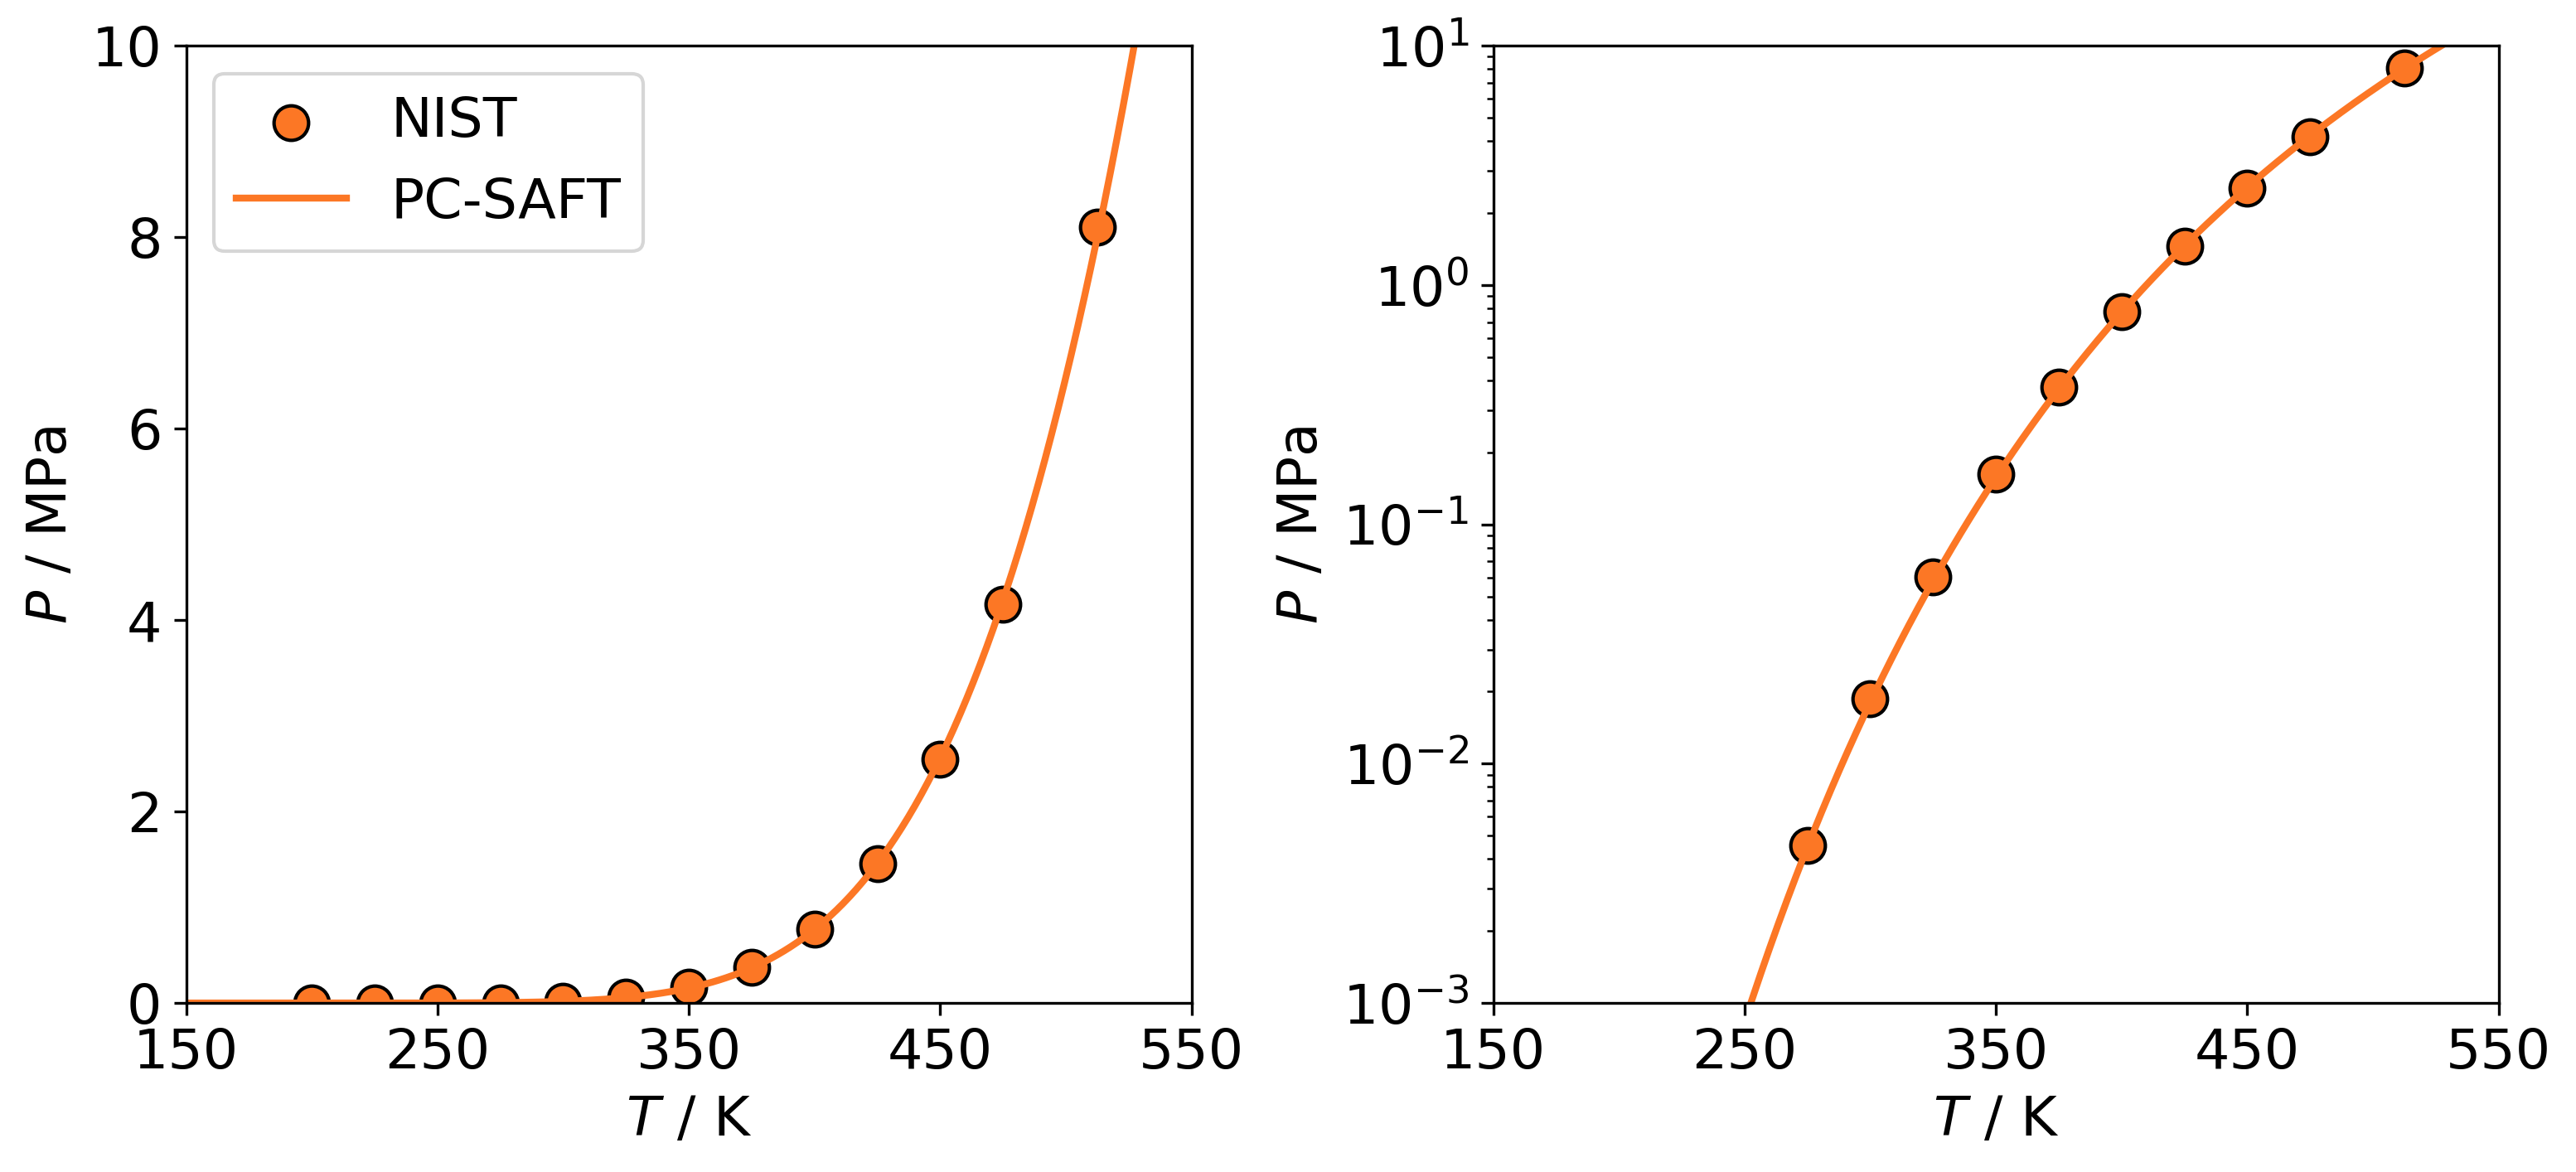

In [16]:
# NIST information
Tsat_NIST = np.array([200, 225, 250, 275, 300, 325, 350, 
                      375, 400, 425, 450, 475, 512.6])            # K
Psat_NIST = np.array([6.10E-06, 9.43E-05, 0.0008103, 0.0045545, 
                      0.018682, 0.06031, 0.16172, 0.37482, 
                      0.77374, 1.4561, 2.5433, 4.1687, 8.1035])  # MPa

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
ax.scatter(Tsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "NIST")
ax.plot(Tsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$T$ / K')
ax.set_ylabel('$P$ / MPa')
ax.axis([150, 550., 0, 10.])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 6))

ax.legend()

ax = axs[1]
ax.plot(Tsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.scatter(Tsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "NIST")
ax.set_xlabel('$T$ / K')
ax.set_ylabel('$P$ / MPa')
ax.axis([150, 550., 1e-3, 10.])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))

ax.set_yscale('log')

plt.show()

Isothermal calculation

In [17]:
T1 = 298.15  
Psat1, vLsat1, vVsat1 = saft.psat(T1)
P0 = 1e-3
Pf = 1000e6
n = 500                            # Number of points
PV1 = np.linspace(P0, Psat1, n)    # Pressure vector for vapor phase
PL1 = np.linspace(Psat1, Pf, n)    # Pressure vector for liquid phase
vL1   = np.zeros_like(PL1)
vV1   = np.zeros_like(PV1)
for i in range(n):
    vL1[i] =  1/saft.density(T1, PL1[i], 'L')     
    vV1[i] =  1/saft.density(T1, PV1[i], 'V')     


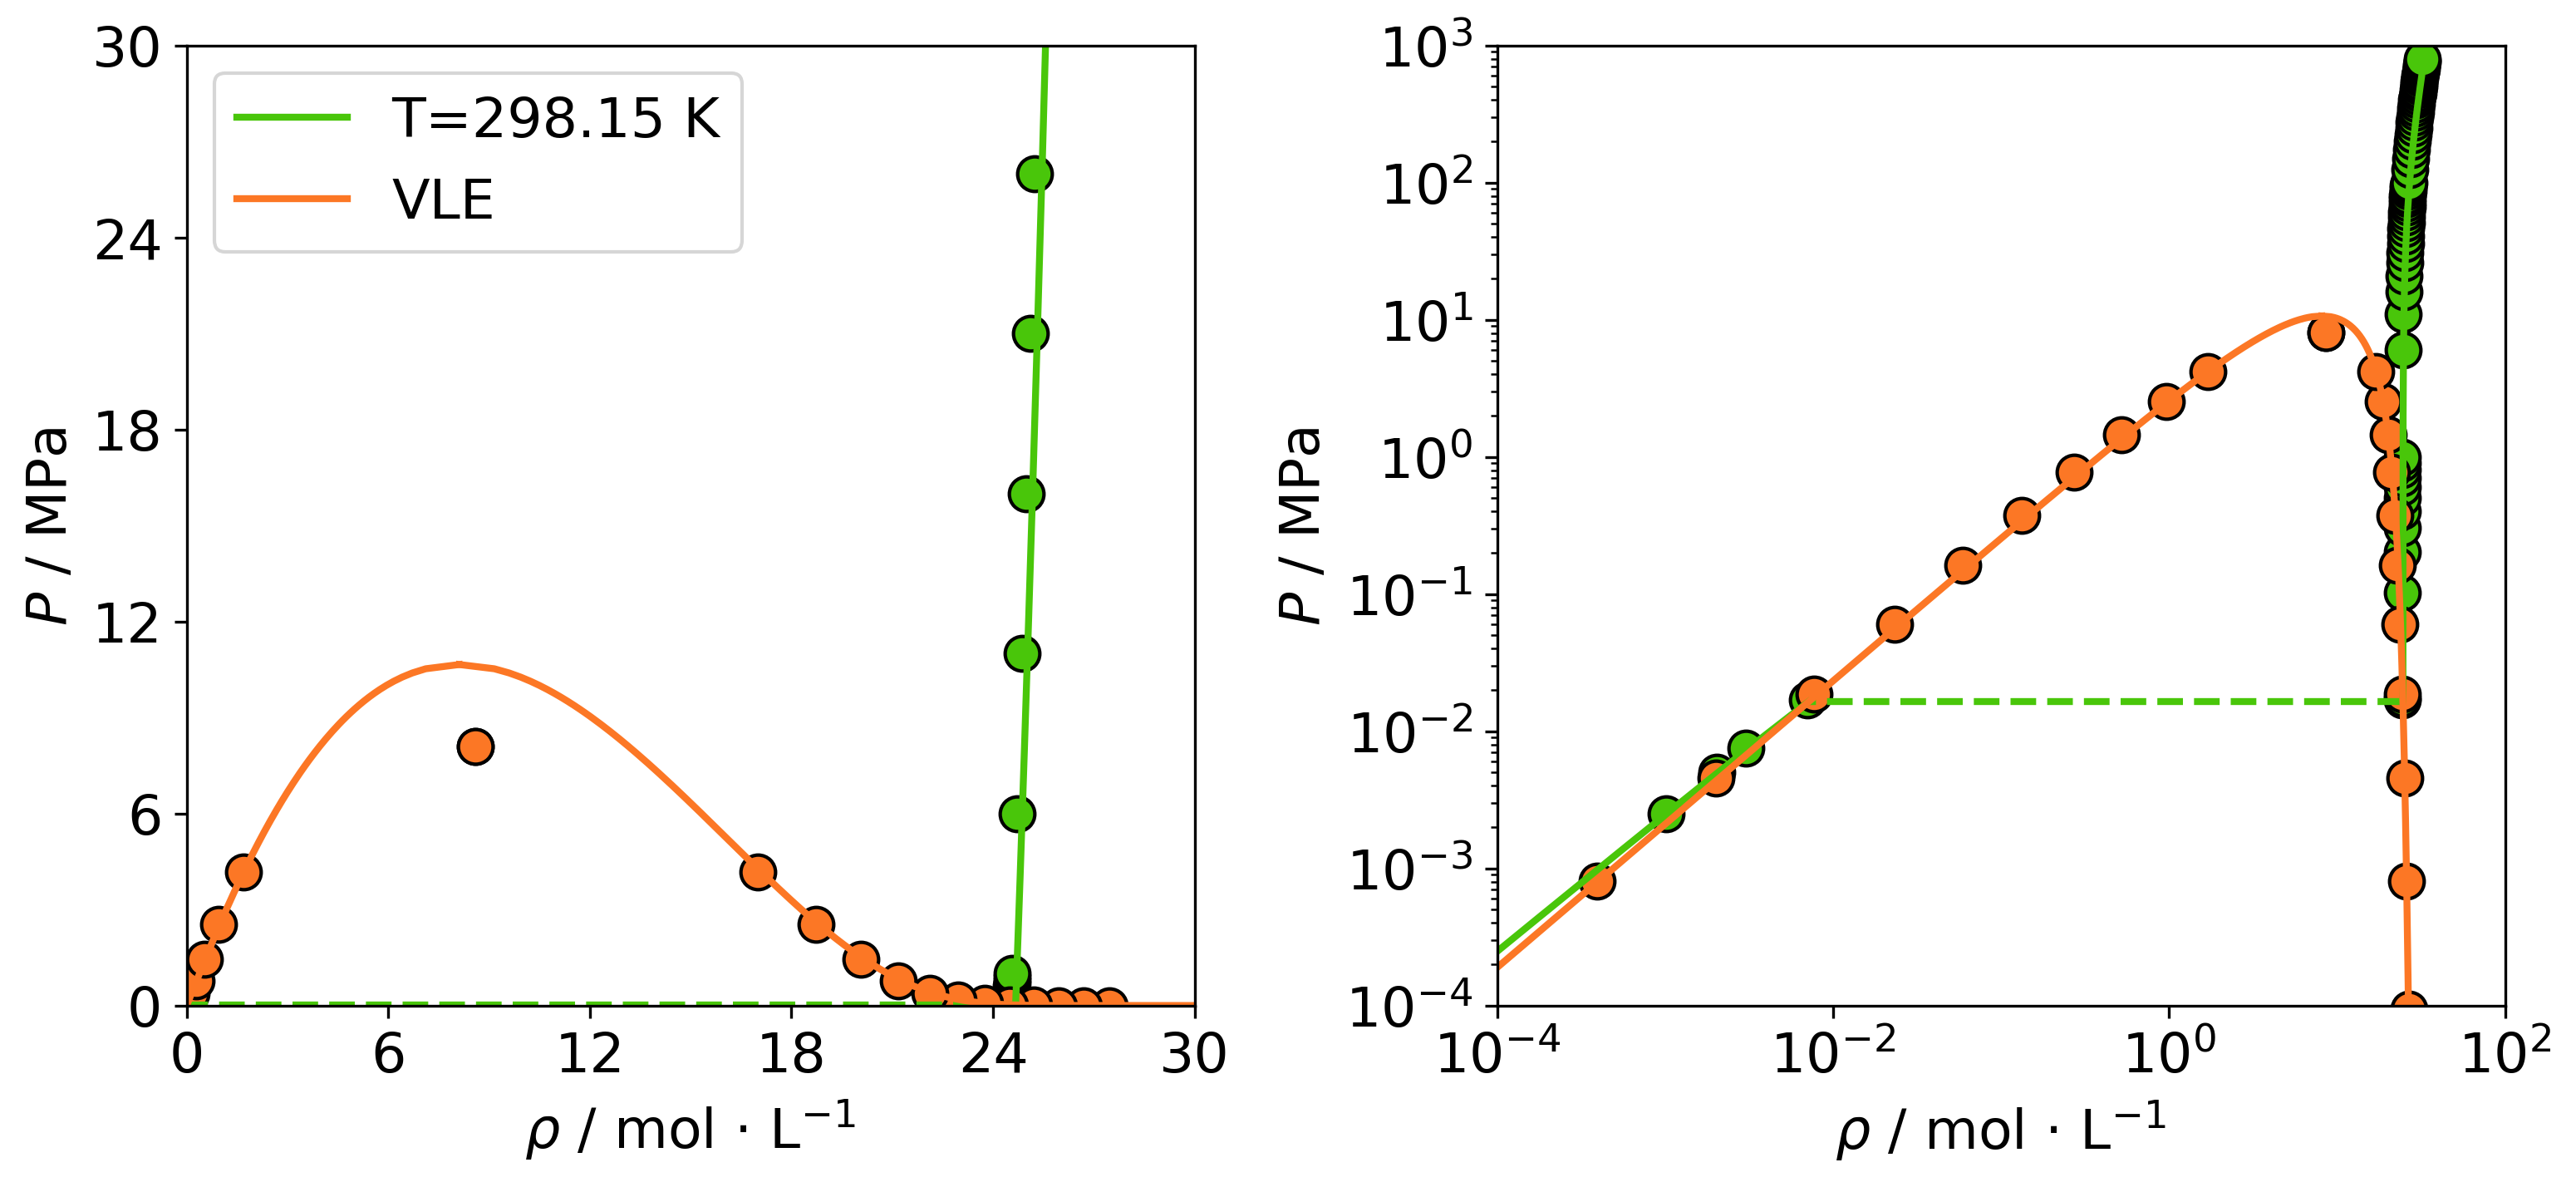

In [18]:
# NIST information
Tsat_NIST = np.array([200, 225, 250, 275, 300, 325, 350, 
                      375, 400, 425, 450, 475, 512.6])                         # K
Psat_NIST = np.array([6.10E-06, 9.43E-05, 0.0008103, 0.0045545, 
                      0.018682, 0.06031, 0.16172, 0.37482, 
                      0.77374, 1.4561, 2.5433, 4.1687, 8.1035])                # MPa
rhoLsat_NIST = np.array([27.473, 26.703, 25.951, 25.214, 24.484, 
                         23.742, 22.965, 22.123, 21.178, 20.079, 
                         18.741, 16.989, 8.6])                              # mol / L
rhoVsat_NIST = np.array([3.67E-06, 5.06E-05, 0.00039252, 0.0020205, 
                         0.0076845, 0.023291, 0.059462, 0.13344, 
                         0.27259, 0.52289, 0.96219, 1.6969, 8.6])           # mol / L

P1_NIST = np.array([0.00250, 0.00500, 0.00750, 0.01698, 0.01698, 0.01750, 
                    0.10250, 0.20250, 0.30250, 0.40250, 0.50250, 0.60250, 
                    0.70250, 0.80250, 0.90250, 1.00000, 6.00000, 11.00000, 
                    16.00000, 21.00000, 26.00000, 31.00000, 36.00000, 41.00000,
                    46.00000, 51.00000, 56.00000, 61.00000, 66.00000, 71.00000, 
                    76.00000, 81.00000, 86.00000, 91.00000, 96.00000, 100.00000,
                    125.00000, 150.00000, 175.00000, 200.00000, 225.00000, 
                    250.00000, 275.00000, 300.00000, 325.00000, 350.00000, 
                    375.00000, 400.00000, 425.00000, 450.00000, 475.00000, 
                    500.00000, 525.00000, 550.00000, 575.00000, 600.00000, 
                    625.00000, 650.00000, 675.00000, 700.00000, 725.00000, 
                    750.00000, 775.00000, 800.00000])                             # MPa
rho1_NIST = np.array([0.0010102, 0.0020244, 0.0030441, 0.0070211, 
                      24.538, 24.538, 24.54, 24.544, 24.547, 24.55, 
                      24.553, 24.556, 24.559, 24.562, 24.565, 24.568, 
                      24.717, 24.858, 24.992, 25.12, 25.243, 25.361, 
                      25.475, 25.585, 25.691, 25.794, 25.894, 25.991, 
                      26.085, 26.177, 26.267, 26.354, 26.44, 26.523, 
                      26.605, 26.669, 27.048, 27.393, 27.711, 28.007, 
                      28.284, 28.545, 28.792, 29.026, 29.248, 29.461, 
                      29.665, 29.861, 30.049, 30.23, 30.405, 30.574, 
                      30.738, 30.897, 31.052, 31.201, 31.347, 31.489, 
                      31.628, 31.762, 31.894, 32.023, 32.149, 32.272])         # mol / L

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
# Isothermal
ax.scatter(rho1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(1e-3/vV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([1e-3/vLsat1, 1e-3/vVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(rhoLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(rhoVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(1e-3/vVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)

# Plot configurations
ax.set_xlabel(r'$\rho$ / mol $\cdot$ L$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([0, 30., 0, 30.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 6))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 6))
ax.legend()


ax = axs[1]
# Isothermal
ax.scatter(rho1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(1e-3/vV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([1e-3/vLsat1, 1e-3/vVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(rhoLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(rhoVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(1e-3/vVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.set_xlabel(r'$\rho$ / mol $\cdot$ L$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([1e-4, 100., 1e-4, 1000.])
ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

Thermal properties: heat capacities 

In [19]:
# Ideal heat capacity from DIPPR 801 for butane.
r = 8.314  # J / mol K
k1 = 39252
k2 = 87900 
k3 = 1916.5
k4 = 53654
k5 = 896.7
def CpCvId(T):
    CpId = k1 + k2 * ((k3/T) /np.sinh(k3/T))**2
    CpId += k4 * ((k5/T) /np.cosh(k5/T))**2
    CpId /= 1000.
    CvId = CpId - r
    return CpId, CvId

# Calculation in the VLE
n = len(Psat)
CpLsat = np.zeros_like(Psat)
CvLsat = np.zeros_like(Psat)
CpVsat = np.zeros_like(Psat)
CvVsat = np.zeros_like(Psat)
for i in range(n):
    CpId, CvId = CpCvId(Tsat[i])
    CvLsat[i] = saft.CvR(1/vLsat[i], Tsat[i]) + CvId
    CpLsat[i] = saft.CpR(Tsat[i], Psat[i], 'L') + CpId
    CvVsat[i] = saft.CvR(1/vVsat[i], Tsat[i]) + CvId
    CpVsat[i] = saft.CpR(Tsat[i], Psat[i], 'V') + CpId
    
# Calculation in the isothermal
CpId, CvId = CpCvId(T1)
CvLsat1 = saft.CvR(1/vLsat1, T1) + CvId
CpLsat1 = saft.CpR(T1, Psat1, 'L') + CpId
CvVsat1 = saft.CvR(1/vVsat1, T1) + CvId
CpVsat1 = saft.CpR(T1, Psat1, 'V') + CpId

n = len(PL1)
CpL1 = np.zeros_like(PL1)
CvL1 = np.zeros_like(PL1)
CpV1 = np.zeros_like(PL1)
CvV1 = np.zeros_like(PL1)
for i in range(n):
    CvL1[i] = saft.CvR(1/vL1[i], T1) + CvId
    CpL1[i] = saft.CpR(T1, PL1[i], 'L') + CpId
    CvV1[i] = saft.CvR(1/vV1[i], T1) + CvId
    CpV1[i] = saft.CpR(T1, PV1[i], 'V') + CpId
    

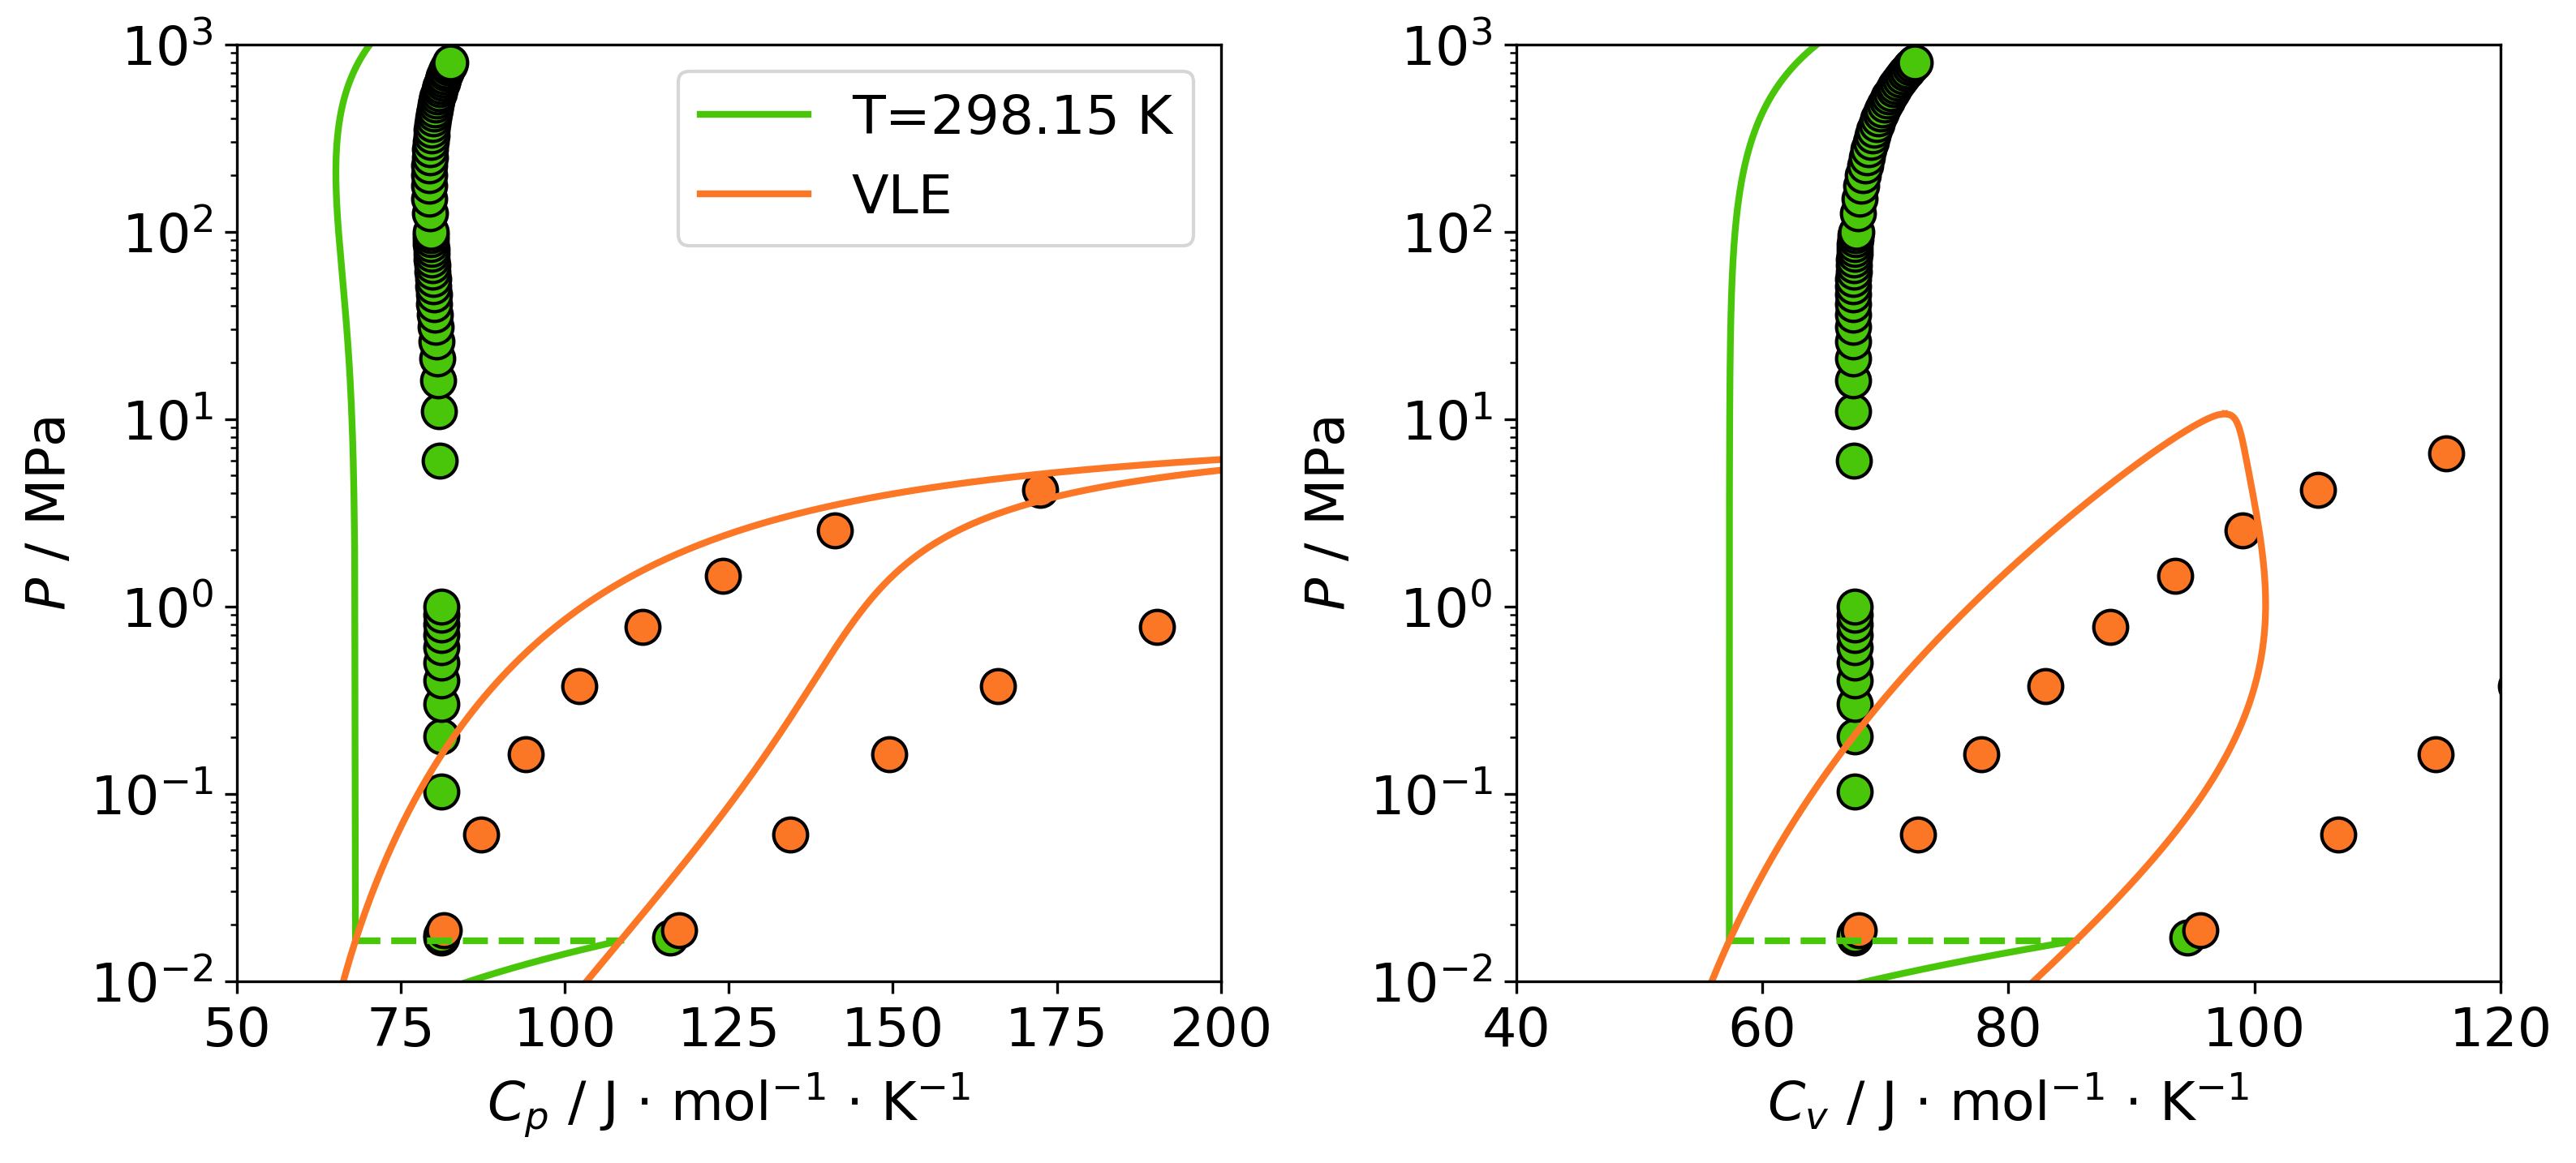

In [20]:
# NIST information
Tsat_NIST = np.array([200, 225, 250, 275, 300, 325, 350, 
                      375, 400, 425, 450, 475, 500])                         # K
Psat_NIST = np.array([6.10E-06, 9.43E-05, 0.0008103, 0.0045545, 
                      0.018682, 0.06031, 0.16172, 0.37482, 
                      0.77374, 1.4561, 2.5433, 4.1687, 6.525])                # MPa
CpLsat_NIST = np.array([70.944, 72.004, 74.084, 77.207, 81.584, 
                        87.229, 94.082, 102.19, 111.86, 124.05, 
                        141.2, 172.4, 319.4])                                # J/mol K
CvLsat_NIST = np.array([56.699, 57.992, 60.329, 63.66, 67.864, 
                        72.667, 77.791, 83.033, 88.293, 93.576, 
                        99.032, 105.2, 115.6])       # J/mol K      
CpVsat_NIST = np.array([45.479, 57.479, 75.954, 97.278, 117.4, 
                        134.42, 149.42, 166.05, 190.22, 228.81,
                        265.02, 261.14, 610.07])                             # J/mol K
CvVsat_NIST = np.array([36.601, 47.248, 63.083, 80.447, 95.581,
                        106.8, 114.71, 121.25, 128.62, 137.73,
                        142.38, 128.91, 126.69])                             # J/mol K    


P1_NIST = np.array([0.00250, 0.00500, 0.00750, 0.01698, 0.01698, 0.01750, 
                    0.10250, 0.20250, 0.30250, 0.40250, 0.50250, 0.60250, 
                    0.70250, 0.80250, 0.90250, 1.00000, 6.00000, 11.00000, 
                    16.00000, 21.00000, 26.00000, 31.00000, 36.00000, 41.00000,
                    46.00000, 51.00000, 56.00000, 61.00000, 66.00000, 71.00000, 
                    76.00000, 81.00000, 86.00000, 91.00000, 96.00000, 100.00000,
                    125.00000, 150.00000, 175.00000, 200.00000, 225.00000, 
                    250.00000, 275.00000, 300.00000, 325.00000, 350.00000, 
                    375.00000, 400.00000, 425.00000, 450.00000, 475.00000, 
                    500.00000, 525.00000, 550.00000, 575.00000, 600.00000, 
                    625.00000, 650.00000, 675.00000, 700.00000, 725.00000, 
                    750.00000, 775.00000, 800.00000])                                # MPa
Cp1_NIST = np.array([44.939, 47.013, 51.442, 116.01, 81.215, 81.215, 81.212, 
                     81.208, 81.203, 81.199, 81.195, 81.191, 81.187, 81.182, 
                     81.178, 81.174, 80.981, 80.812, 80.663, 80.531, 80.413, 
                     80.307, 80.212, 80.126, 80.048, 79.977, 79.913, 79.854, 
                     79.801, 79.752, 79.708, 79.668, 79.631, 79.598, 79.567, 
                     79.545, 79.44, 79.383, 79.361, 79.366, 79.392, 79.437, 
                     79.496, 79.569, 79.653, 79.747, 79.851, 79.963, 80.083, 
                     80.21, 80.343, 80.484, 80.63, 80.782, 80.94, 81.103, 81.271, 
                     81.444, 81.621, 81.804, 81.99, 82.181, 82.376, 82.575])           # J/mol K 
Cv1_NIST = np.array([36.432, 38.151, 41.881, 94.589, 67.528, 67.528, 67.527, 
                     67.525, 67.524, 67.523, 67.521, 67.52, 67.518, 67.517, 
                     67.516, 67.514, 67.456, 67.416, 67.389, 67.372, 67.364, 
                     67.362, 67.366, 67.374, 67.386, 67.4, 67.417, 67.436, 
                     67.457, 67.479, 67.502, 67.526, 67.551, 67.577, 67.603, 
                     67.625, 67.763, 67.908, 68.055, 68.204, 68.354, 68.506, 
                     68.66, 68.815, 68.972, 69.132, 69.293, 69.456, 69.621, 
                     69.788, 69.958, 70.13, 70.304, 70.48, 70.659, 70.84, 
                     71.023, 71.208, 71.396, 71.586, 71.779, 71.973, 72.17, 72.369])    # J/mol K 

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
# Isothermal
ax.scatter(Cp1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(CpL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(CpV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([CpLsat1, CpVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(CpLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(CpVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(CpLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(CpVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.legend()
ax.set_xlabel(r'$C_p$ / J $\cdot$ mol$^{-1}$ $\cdot$ K$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([50, 200., 1e-2, 1000.])
ax.set_yscale('log')


ax = axs[1]
# Isothermal
ax.scatter(Cv1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(CvL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(CvV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([CvLsat1, CvVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(CvLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(CvVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(CvLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(CvVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.set_xlabel(r'$C_v$ / J $\cdot$ mol$^{-1}$ $\cdot$ K$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([40, 120., 1e-2, 1000.])
ax.set_yscale('log')

plt.show()

Thermal properties: enthalpy and entropy

In [21]:
# Calculation in the VLE
n = len(Psat)
HLsat = np.zeros_like(Psat)
HVsat = np.zeros_like(Psat)
SLsat = np.zeros_like(Psat)
SVsat = np.zeros_like(Psat)

for i in range(n):
    HLsat[i] = saft.EnthalpyR(Tsat[i], Psat[i], 'L') 
    HVsat[i] = saft.EnthalpyR(Tsat[i], Psat[i], 'V') 
    SLsat[i] = saft.EntropyR(Tsat[i], Psat[i], 'L') 
    SVsat[i] = saft.EntropyR(Tsat[i], Psat[i], 'V') 
dHvap = HVsat - HLsat     
dSvap = SVsat - SLsat


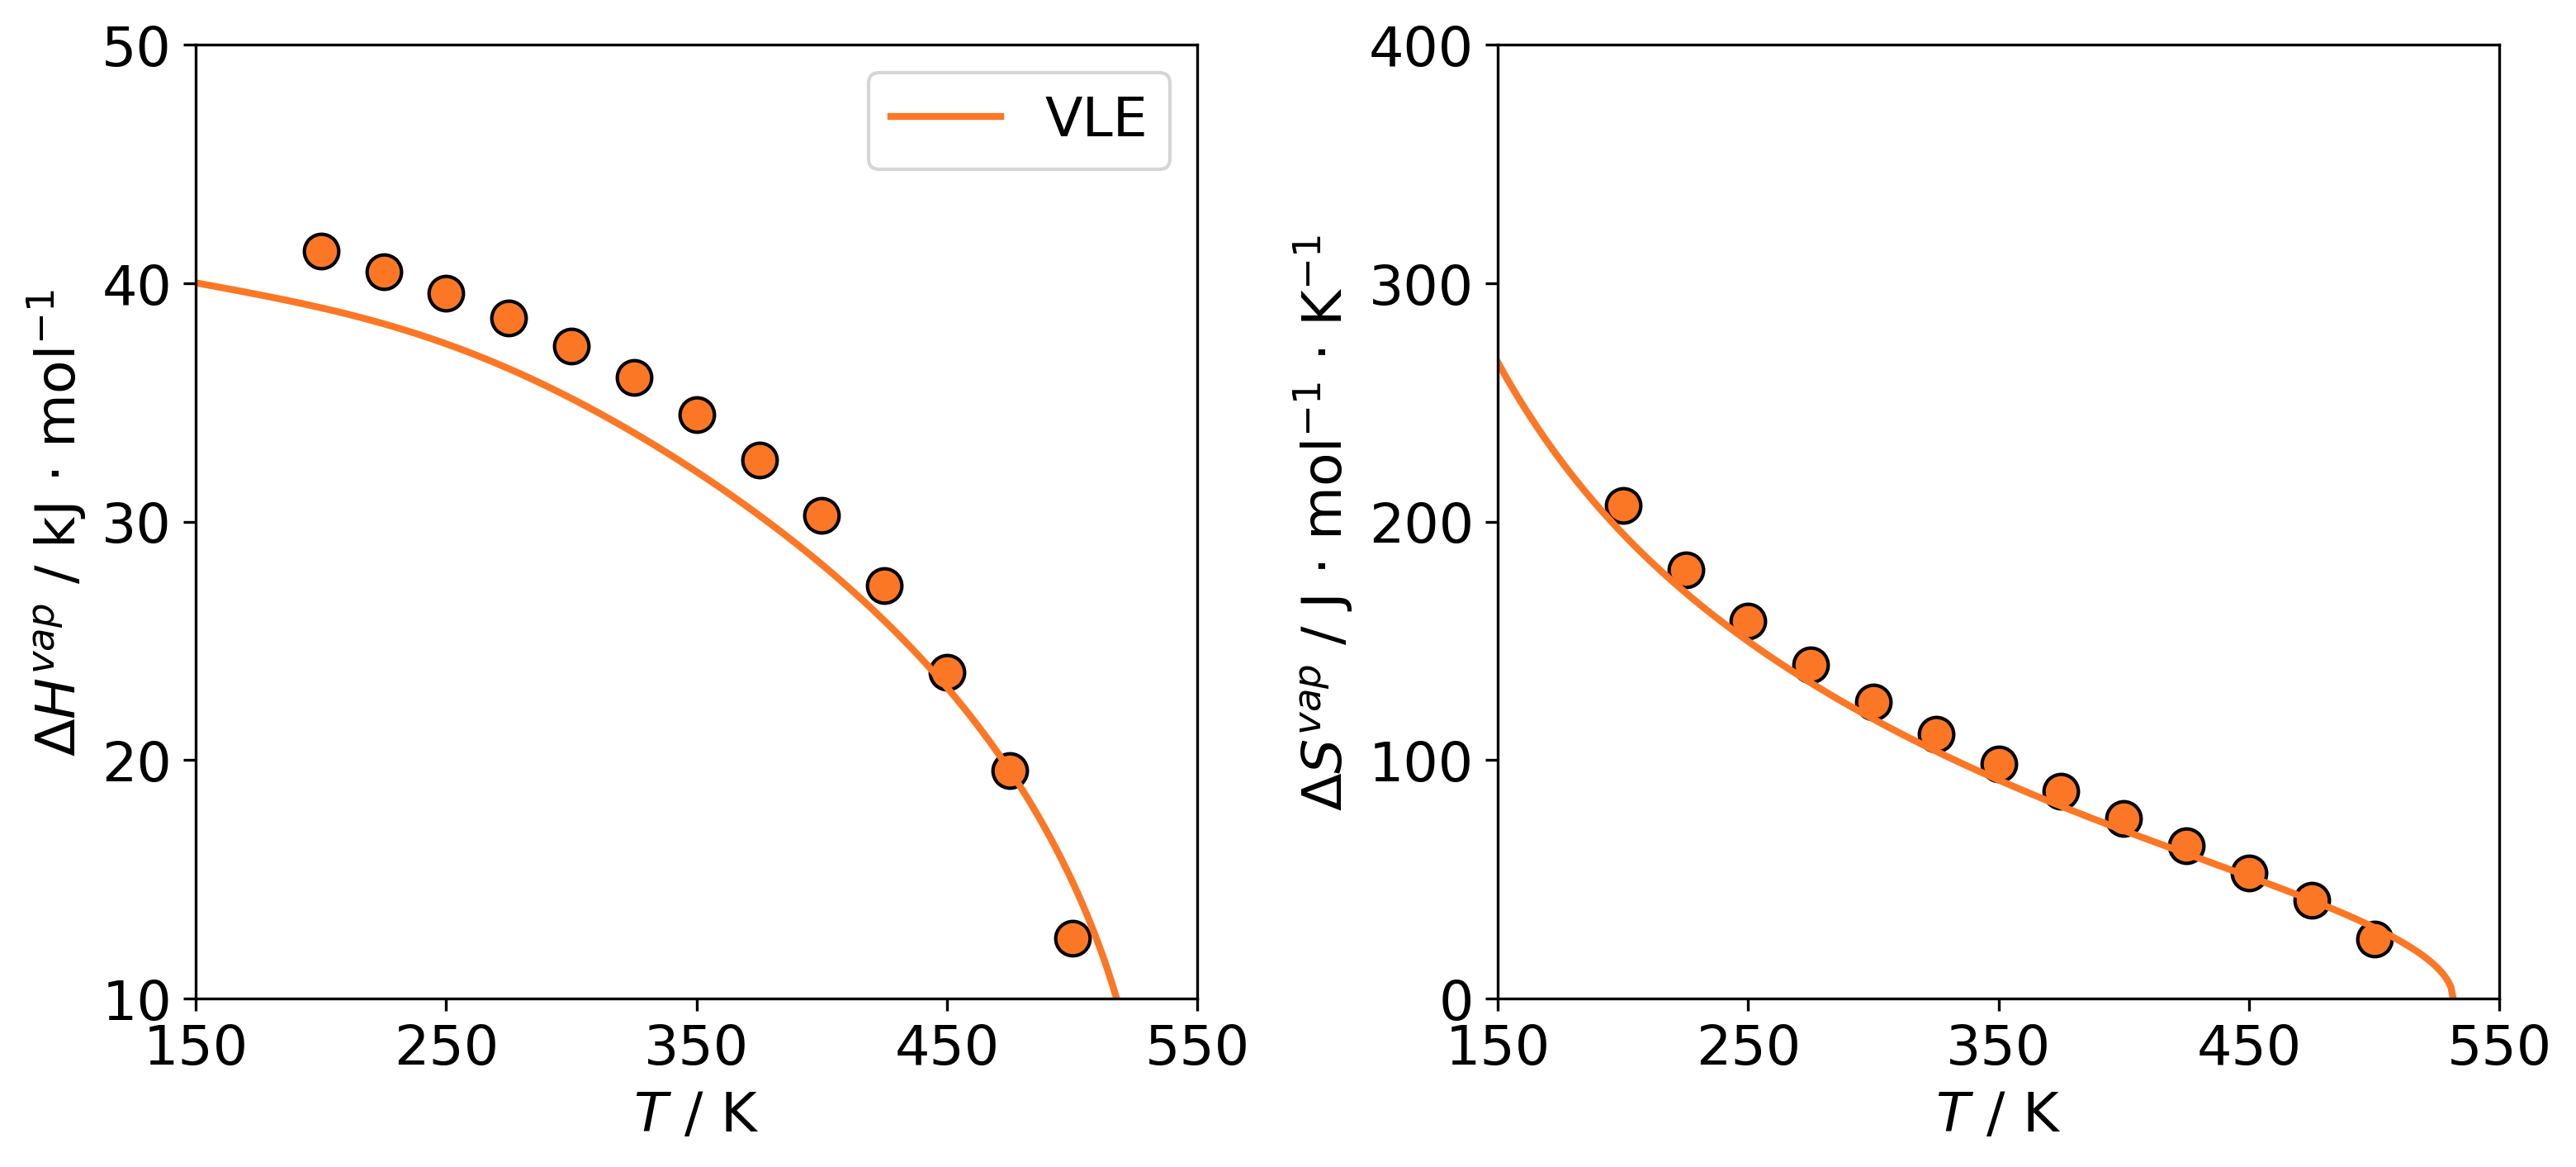

In [22]:
# NIST information
Tsat_NIST = np.array([200, 225, 250, 275, 300, 325, 350, 
                      375, 400, 425, 450, 475, 500])                         # K
Psat_NIST = np.array([6.10E-06, 9.43E-05, 0.0008103, 0.0045545, 
                      0.018682, 0.06031, 0.16172, 0.37482, 
                      0.77374, 1.4561, 2.5433, 4.1687, 6.525])               # MPa
HLsat_NIST = np.array([-10.712, -8.9277, -7.1035, -5.2147, 
                       -3.2322, -1.1235, 1.1428, 3.5975, 
                       6.2747, 9.2188, 12.5, 16.259, 21.049])                # kJ/mol
HVsat_NIST = np.array([30.622, 31.564, 32.463, 33.317, 34.134, 
                       34.911, 35.619, 36.194, 36.54, 36.537, 
                       36.184, 35.82, 33.579])                               # kJ/mol     
SLsat_NIST = np.array([-40.313, -31.908, -24.222, -17.024, 
                       -10.129, -3.3858, 3.3161, 10.061, 
                       16.922, 23.977, 31.347, 39.274, 48.777])              # J/mol K
SVsat_NIST = np.array([166.36, 148.06, 134.04, 123.09, 114.42, 
                       107.49, 101.82, 96.984, 92.584, 88.255, 
                       83.978, 80.455, 73.837])                              # J/mol K    

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]

# VLE
ax.scatter(Tsat_NIST, HVsat_NIST - HLsat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(Tsat, dHvap * 1e-3, color = colorVLE , 
        linewidth = 2.0, label = "VLE")

# Plot configurations
ax.legend()
ax.set_ylabel(r'$\Delta H^{vap}$ / kJ $\cdot$ mol$^{-1}$')
ax.set_xlabel('$T$ / K')
ax.axis([150, 550., 10, 50.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))

ax = axs[1]
ax.scatter(Tsat_NIST, SVsat_NIST - SLsat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(Tsat, dSvap, color = colorVLE , 
        linewidth = 2.0, label = "VLE")

# Plot configurations
ax.set_ylabel(r'$\Delta S^{vap}$ / J $\cdot$ mol$^{-1}$ $\cdot$ K$^{-1}$')
ax.set_xlabel('$T$ / K')
ax.axis([150, 550., 0, 400.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()

Thermal properties: Speed of sound

In [23]:
# Ideal heat capacity from DIPPR 801 for butane.
r = 8.314  # J / mol K
k1 = 39252
k2 = 87900 
k3 = 1916.5
k4 = 53654
k5 = 896.7
def CpCvId(T):
    CpId = k1 + k2 * ((k3/T) /np.sinh(k3/T))**2
    CpId += k4 * ((k5/T) /np.cosh(k5/T))**2
    CpId /= 1000.
    CvId = CpId - r
    return CpId, CvId

# Calculation in the VLE
n = len(Psat)
uLsat = np.zeros_like(Psat)
uVsat = np.zeros_like(Psat)

for i in range(n):
    CpId, CvId = CpCvId(Tsat[i])
    uLsat[i] = saft.speed_sound(Tsat[i], Psat[i], 'L', CvId=CvId, CpId=CpId)
    uVsat[i] = saft.speed_sound(Tsat[i], Psat[i], 'V', CvId=CvId, CpId=CpId)

    
# Calculation in the isothermal
CpId, CvId = CpCvId(T1)
uLsat1 = saft.speed_sound(T1, Psat1, 'L', CvId=CvId, CpId=CpId)
uVsat1 = saft.speed_sound(T1, Psat1, 'V', CvId=CvId, CpId=CpId)

n = len(PL1)
uL1 = np.zeros_like(PL1)
uV1 = np.zeros_like(PL1)
for i in range(n):
    uL1[i] = saft.speed_sound(T1, PL1[i], 'L', CvId=CvId, CpId=CpId)
    uV1[i] = saft.speed_sound(T1, PV1[i], 'V', CvId=CvId, CpId=CpId)
    

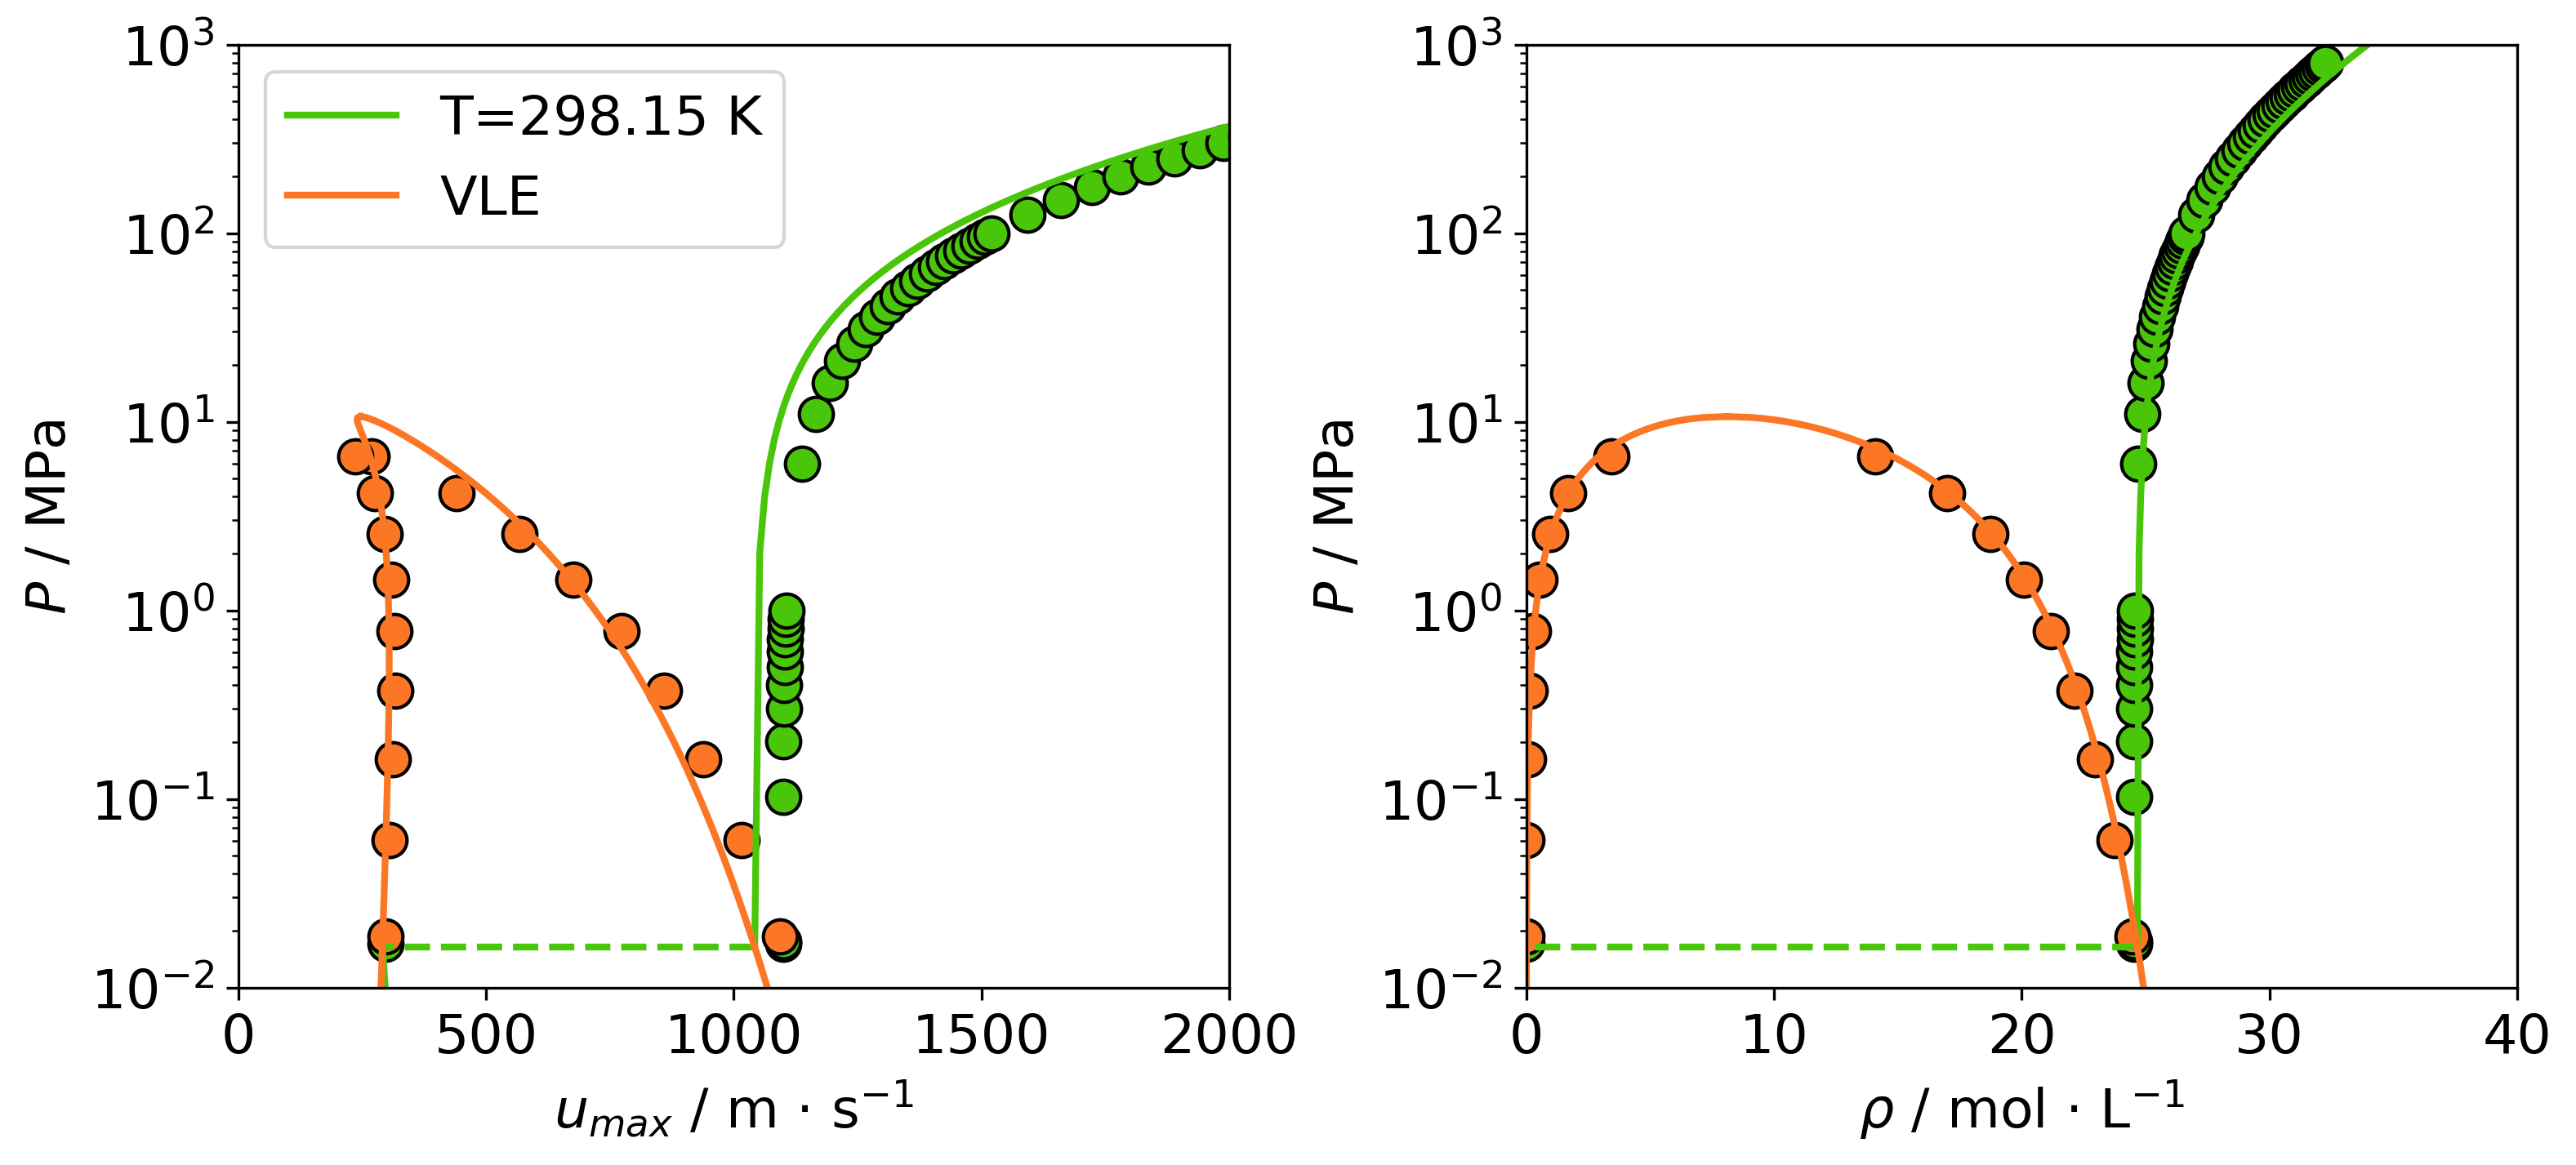

In [24]:
# NIST information
Tsat_NIST = np.array([200, 225, 250, 275, 300, 325, 350, 
                      375, 400, 425, 450, 475, 500])                         # K
Psat_NIST = np.array([6.10E-06, 9.43E-05, 0.0008103, 0.0045545, 
                      0.018682, 0.06031, 0.16172, 0.37482, 
                      0.77374, 1.4561, 2.5433, 4.1687, 6.525])               # MPa
uLsat_NIST = np.array([1471.1, 1363.2, 1266.7, 1176.7, 1093.5, 
                       1015.5, 938.89, 859.31, 772.84, 676.21, 
                       567.09, 441.11, 269.59])                               # m/s
uVsat_NIST = np.array([253.63, 265.3, 276.25, 287.02, 297.15, 
                       305.94, 312.61, 316.2, 315.37, 308.4, 
                       295.26, 275.02, 236.75])                                # m/s     
rhoLsat_NIST = np.array([27.473, 26.703, 25.951, 25.214, 24.484, 
                         23.742, 22.965, 22.123, 21.178, 20.079, 
                         18.741, 16.989, 14.092])                              # mol / L
rhoVsat_NIST = np.array([3.67E-06, 5.06E-05, 0.00039252, 0.0020205, 
                         0.0076845, 0.023291, 0.059462, 0.13344, 
                         0.27259, 0.52289, 0.96219, 1.6969, 3.4293])           # mol / L

P1_NIST = np.array([0.00250, 0.00500, 0.00750, 0.01698, 0.01698, 0.01750, 
                    0.10250, 0.20250, 0.30250, 0.40250, 0.50250, 0.60250, 
                    0.70250, 0.80250, 0.90250, 1.00000, 6.00000, 11.00000, 
                    16.00000, 21.00000, 26.00000, 31.00000, 36.00000, 41.00000,
                    46.00000, 51.00000, 56.00000, 61.00000, 66.00000, 71.00000, 
                    76.00000, 81.00000, 86.00000, 91.00000, 96.00000, 100.00000,
                    125.00000, 150.00000, 175.00000, 200.00000, 225.00000, 
                    250.00000, 275.00000, 300.00000, 325.00000, 350.00000, 
                    375.00000, 400.00000, 425.00000, 450.00000, 475.00000, 
                    500.00000, 525.00000, 550.00000, 575.00000, 600.00000, 
                    625.00000, 650.00000, 675.00000, 700.00000, 725.00000, 
                    750.00000, 775.00000, 800.00000])                             # MPa
rho1_NIST = np.array([0.0010102, 0.0020244, 0.0030441, 0.0070211, 
                      24.538, 24.538, 24.54, 24.544, 24.547, 24.55, 
                      24.553, 24.556, 24.559, 24.562, 24.565, 24.568, 
                      24.717, 24.858, 24.992, 25.12, 25.243, 25.361, 
                      25.475, 25.585, 25.691, 25.794, 25.894, 25.991, 
                      26.085, 26.177, 26.267, 26.354, 26.44, 26.523, 
                      26.605, 26.669, 27.048, 27.393, 27.711, 28.007, 
                      28.284, 28.545, 28.792, 29.026, 29.248, 29.461, 
                      29.665, 29.861, 30.049, 30.23, 30.405, 30.574, 
                      30.738, 30.897, 31.052, 31.201, 31.347, 31.489, 
                      31.628, 31.762, 31.894, 32.023, 32.149, 32.272])         # mol / L
u1_NIST = np.array([308.37, 307.53, 306.06, 296.44, 1099.5, 1099.5, 
                    1100, 1100.7, 1101.4, 1102, 1102.7, 1103.3, 1104, 
                    1104.6, 1105.3, 1105.9, 1137.3, 1166.5, 1193.9, 
                    1219.6, 1244.1, 1267.4, 1289.7, 1311.1, 1331.7, 
                    1351.6, 1370.8, 1389.5, 1407.7, 1425.3, 1442.5, 
                    1459.3, 1475.7, 1491.7, 1507.4, 1519.8, 1592.8, 
                    1660, 1722.6, 1781.4, 1837, 1889.8, 1940.2, 1988.4, 
                    2034.8, 2079.4, 2122.5, 2164.2, 2204.6, 2243.8, 
                    2281.9, 2318.9, 2355.1, 2390.3, 2424.7, 2458.4, 
                    2491.3, 2523.6, 2555.2, 2586.2, 2616.6, 2646.5, 
                    2675.9, 2704.7])                                             # m/s



font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
# Isothermal
ax.scatter(u1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(uL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(uV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([uLsat1, uVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(uLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(uVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(uLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(uVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.legend()
ax.set_xlabel(r'$u_{max}$ / m $\cdot$ s$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([0, 2000., 1e-2, 1000.])
ax.set_yscale('log')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))

ax = axs[1]
# Isothermal
ax.scatter(rho1_NIST, P1_NIST, s = 100, c = color1, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vL1, PL1*1e-6, color = color1 , 
        linewidth = 2.0, label = "T=" + str(T1) + " K")
ax.plot(1e-3/vV1, PV1*1e-6, color = color1 , 
        linewidth = 2.0)
ax.plot([1e-3/vLsat1, 1e-3/vVsat1], [Psat1*1e-6, Psat1*1e-6], color = color1 , 
        linewidth = 2.0, linestyle='dashed')
# VLE
ax.scatter(rhoLsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.scatter(rhoVsat_NIST, Psat_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(1e-3/vLsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0, label = "VLE")
ax.plot(1e-3/vVsat, Psat*1e-6, color = colorVLE , 
        linewidth = 2.0)
# Plot configurations
ax.set_xlabel(r'$\rho$ / mol $\cdot$ L$^{-1}$')
ax.set_ylabel('$P$ / MPa')
ax.axis([0, 40., 1e-2, 1000.])
ax.set_yscale('log')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
plt.show()

# Square Gradient Theory for Pure Components
Using the open-source python package: sgtpy (https://github.com/gustavochm/sgtpy)

In [25]:
from sgtpy.sgt import sgt_pure
from sgtpy.fit import fit_cii

First, the influence parameter ($c_{ii}$) is fitting from experimental interfacial tension data.

In [26]:
# NIST information
Tsat_NIST = np.array([200, 225, 250, 275, 300, 325, 350, 
                      375, 400, 425, 450, 475, 500], dtype=float)                # K
tension_NIST = np.array([31.717, 28.834, 26.347, 24.108, 
                         21.993, 19.895, 17.727, 15.42, 
                         12.928, 10.224, 7.3155, 4.2573, 1.2466])                 # mN/m

nexp = len(Tsat_NIST)
Psaft = np.zeros(nexp)
rhosaftl = np.zeros(nexp)
rhosaftv = np.zeros(nexp)
for i in range(nexp):                   
    Psaft[i], vLsat, vVsat = saft.psat(Tsat_NIST[i])           
    rhosaftl[i], rhosaftv[i] =  1./vLsat, 1./vVsat  
fit_cii(tension_NIST, Tsat_NIST, Psaft, rhosaftl, rhosaftv, saft, deg=0)

array([3.01005029e-20])

Redefine the equation of state with the new parameter

In [27]:
c2oh = component('Methanol', ms = 1.5255, sigma = 3.2300, eps = 188.90, 
                 kappaAB = 0.035176, eAB = 2899.5, sites = [0, 1, 1], 
                 cii = 3.01005029e-20, Mw = 32.0422)
saft = pcsaft(c2oh)

In [28]:
T0 = 100.
Tf = saft.Tc
n = 100                            # Number of points
Tsat = np.linspace(T0, Tf, n)      # Temperature vector
Psat = np.zeros_like(Tsat)         # Vector to save the information
tension  = np.zeros_like(Tsat)
for i in range(n - 1):                   
    Psat[i], vL, vV = saft.psat(Tsat[i])                # Solving and saving the VLE
    tension[i] = sgt_pure(1/vL, 1/vV, Tsat[i], 
                          Psat[i], saft)                # Solving SGT equation
Psat[-1], tension[-1] = saft.Pc, 0.                     # Saving the critical point

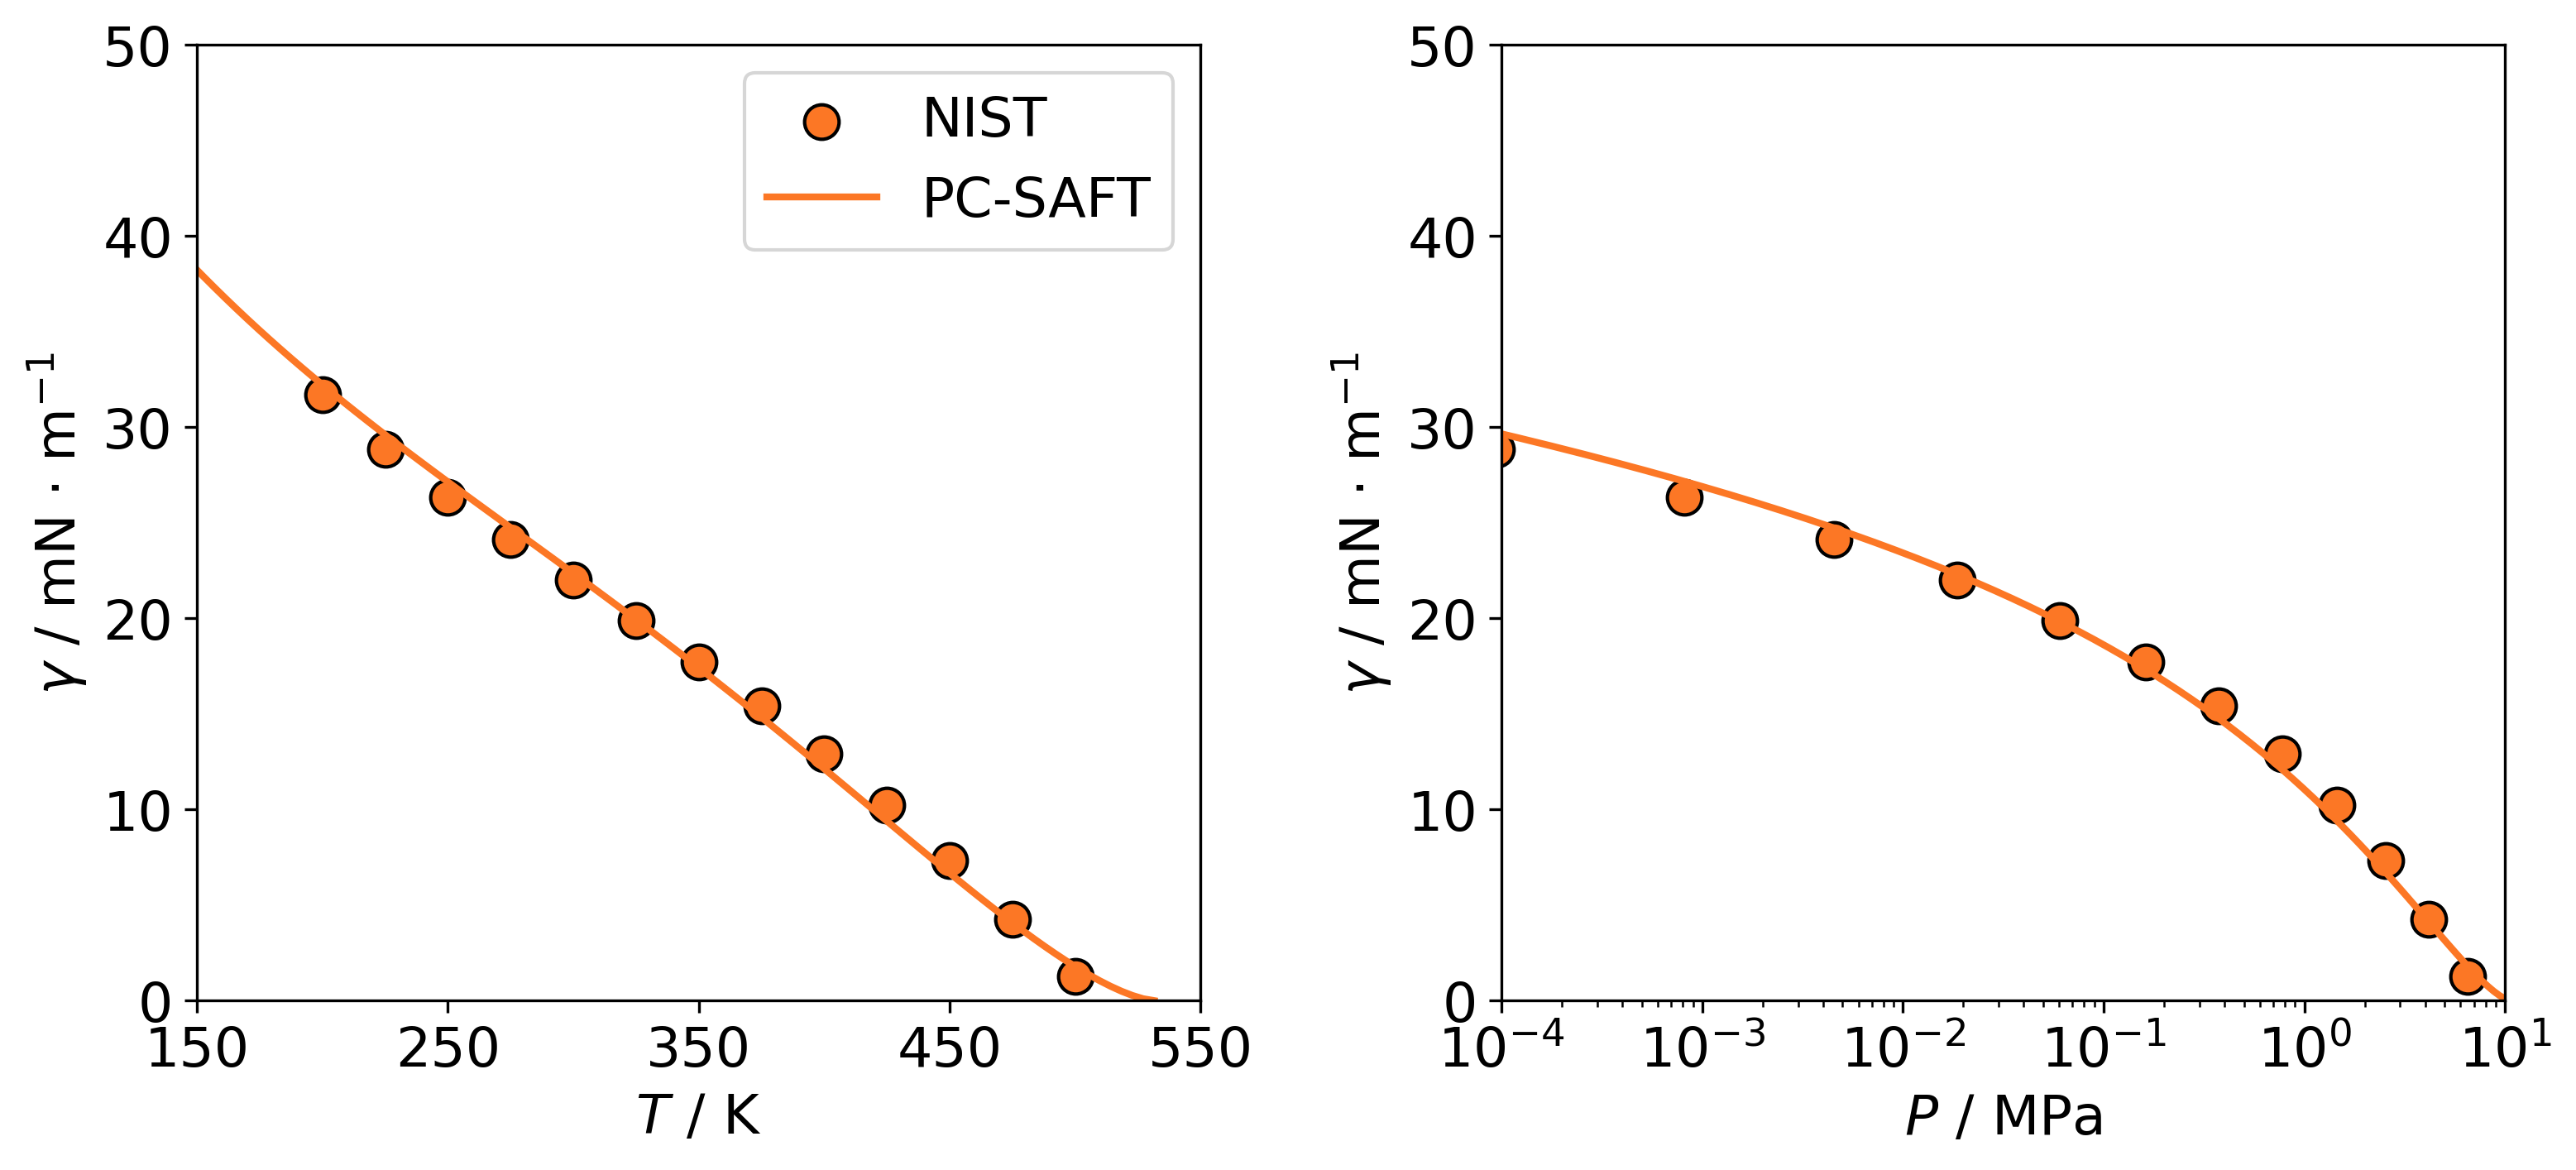

In [29]:
# NIST information
Tsat_NIST = np.array([200, 225, 250, 275, 300, 325, 350, 
                      375, 400, 425, 450, 475, 500], dtype=float)                # K
tension_NIST = np.array([31.717, 28.834, 26.347, 24.108, 
                         21.993, 19.895, 17.727, 15.42, 
                         12.928, 10.224, 7.3155, 4.2573, 1.2466])                 # mN/m
Psat_NIST = np.array([6.10E-06, 9.43E-05, 0.0008103, 0.0045545, 
                      0.018682, 0.06031, 0.16172, 0.37482, 
                      0.77374, 1.4561, 2.5433, 4.1687, 6.525])               # MPa

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
ax.scatter(Tsat_NIST, tension_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "NIST")
ax.plot(Tsat, tension, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$T$ / K')
ax.set_ylabel(r'$\gamma$ / mN $\cdot$ m$^{-1}$')
ax.axis([150, 550., 0, 50.])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 6))

ax.legend()

ax = axs[1]
ax.scatter(Psat_NIST, tension_NIST, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "NIST")
ax.plot(Psat * 1e-6, tension, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.set_xlabel('$P$ / MPa')
ax.set_ylabel(r'$\gamma$ / mN $\cdot$ m$^{-1}$')
ax.axis([1e-4, 10., 0, 50.])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
ax.set_xscale('log')

plt.show()

Density profile at 298.15 K

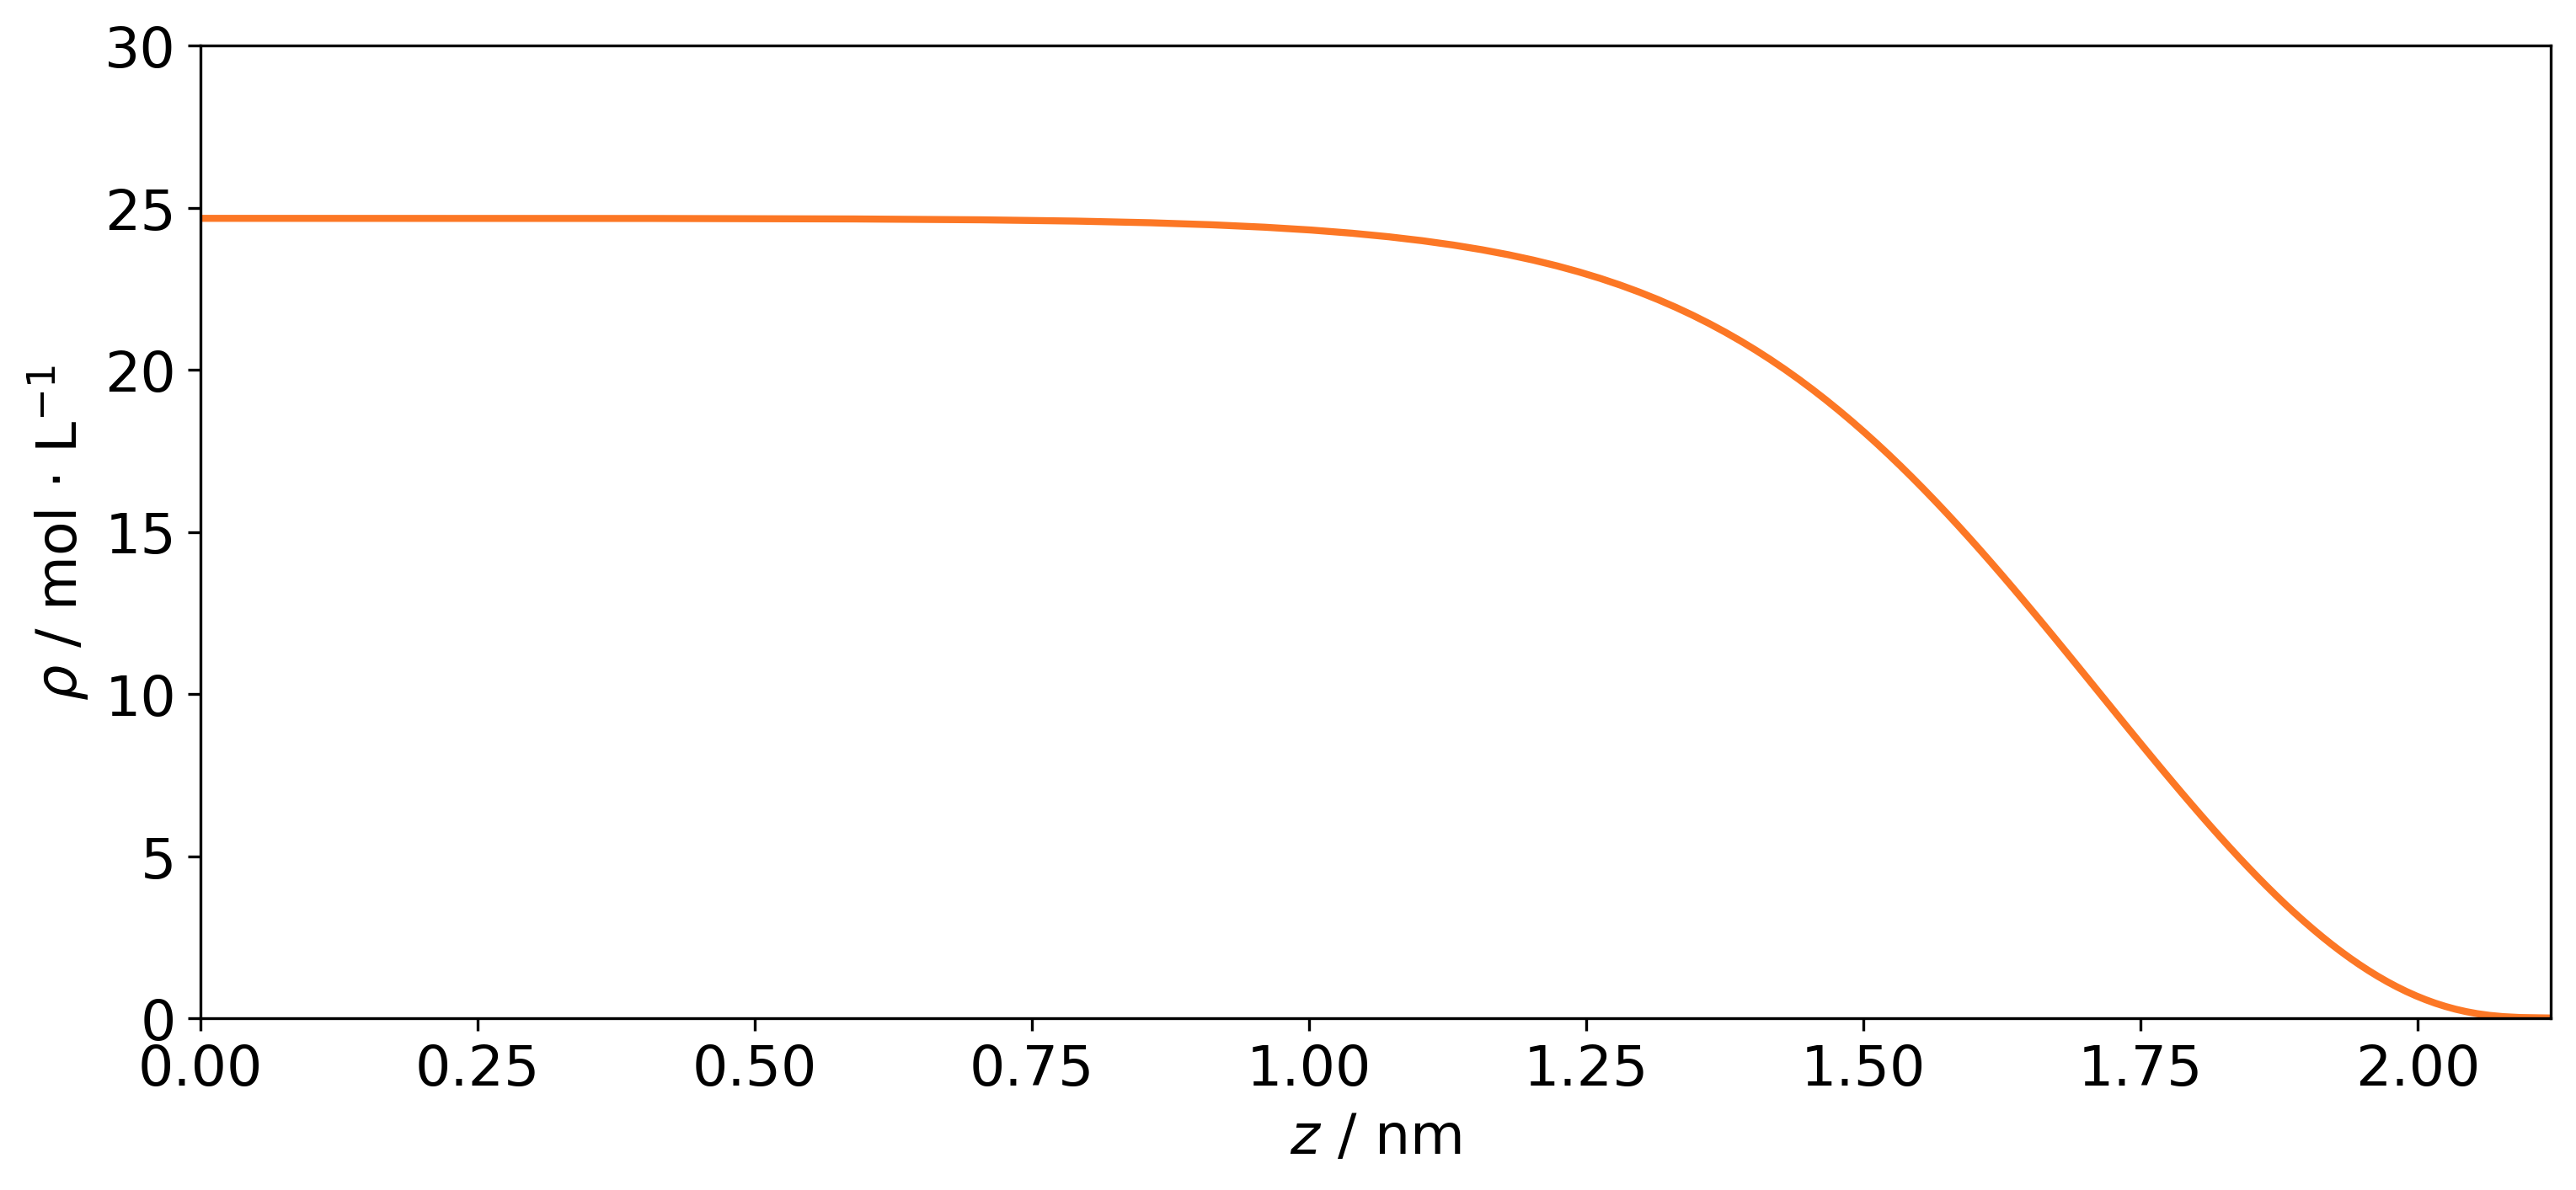

In [30]:
Tsat = 298.15        
Psat, vL, vV = saft.psat(Tsat)                   
out = sgt_pure(1/vL, 1/vV, Tsat, Psat, 
                      saft, full_output=True)   

fig, ax = plt.subplots(1,1, figsize=(12, 5), dpi = 300)

z   = np.append(0, out.z)/10 # Amstrong to nm & adding the bulk phase (liquid-phase)
rho = np.append(1/vL, out.rho) * 1e-3
colorVLE = "#FC7725"
ax.plot(z, rho, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$z$ / nm')
ax.set_ylabel(r'$\rho$ / mol $\cdot$ L$^{-1}$')
ax.axis([0, max(z), 0, 30.])
plt.show()